**преобразование признаков**

Евгений Борисов esborisov@sevsu.ru

* простое масштабирование
* робастное масштабирование
* стандартизация
* log-transform
* работа с категориальными признаками
* категоризация числовых признаков
* бинаризация категориальных признаков

Полезные методы работы с данными в Pandas   
https://habr.com/ru/companies/otus/articles/727222/


In [1]:
import numpy as np
from numpy import random as rng
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.3f}'.format

# log-transform


In [3]:
x = np.linspace(-1.,1.,100)
y = np.exp(x*3)

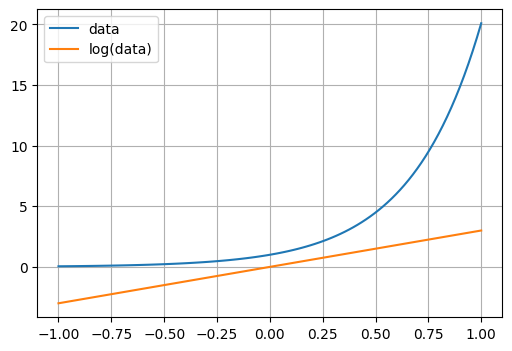

In [9]:
fig = plt.figure(figsize=(6,4))
plt.plot(x,y,label='data')
plt.plot(x,np.log(y),label='log(data)')
plt.legend()
plt.grid()

In [7]:
# fig,ax = plt.subplots(1,2,figsize=(9,4))

# ax[0].plot(x,y,label='data')
# ax[0].legend()
# ax[0].grid()

# ax[1].plot(x,y,label='log(data)')
# # ax[1].plot(x,np.log(y),label='log(data)')
# ax[1].legend()
# ax[1].grid()
# ax[1].set_yscale('symlog', linthresh=.1)

# категоризация числовых признаков

In [10]:
x = rng.uniform(size=(100,1)) # генерируем случайный набор значений 
display(x.shape )

(100, 1)

In [16]:
df = pd.DataFrame({'x':x.flatten()})
display(df)

,x
0,0.974
1,0.906
2,0.195
3,0.661
4,0.636
...,...
95,0.468
96,0.601
97,0.916
98,0.545


<Axes: >

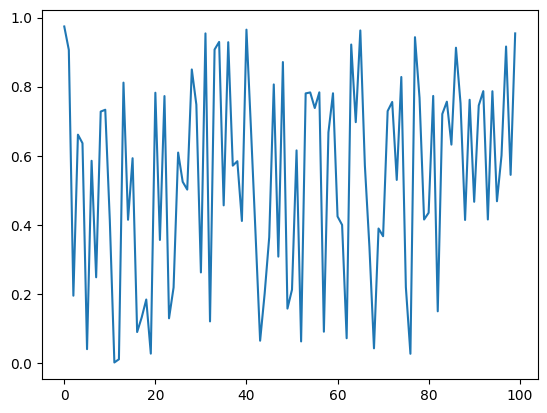

In [23]:
df['x'].plot()

In [45]:
q = [.0,.1,.25,.50,.75,.95,1.0]
df['cat'] = pd.qcut( df['x'], q=q, labels=range(len(q)-1),  )

In [46]:
display( df[['x']].describe(q[1:-1]).T )

,count,mean,std,min,10%,25%,50%,75%,95%,max
x,100.000,0.537,0.290,0.002,0.091,0.329,0.585,0.775,0.944,0.974


In [48]:
display( df )

,x,cat
0,0.974,5
1,0.906,4
2,0.195,1
3,0.661,3
4,0.636,3
...,...,...
95,0.468,2
96,0.601,3
97,0.916,4
98,0.545,2


# бинаризация категорий

In [61]:
df = pd.concat([ df, pd.get_dummies( df['cat'] ,dtype=int,prefix='cat') ],axis=1)

In [62]:
df

,x,cat,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5
0,0.974,5,0,0,0,0,0,1
1,0.906,4,0,0,0,0,1,0
2,0.195,1,0,1,0,0,0,0
3,0.661,3,0,0,0,1,0,0
4,0.636,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
95,0.468,2,0,0,1,0,0,0
96,0.601,3,0,0,0,1,0,0
97,0.916,4,0,0,0,0,1,0
98,0.545,2,0,0,1,0,0,0
